In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("train.csv")

In [3]:
features = ["Sex", "Pclass"]
target = "Survived"

In [4]:
df = df[features + [target]]
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

In [5]:
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nTarget Distribution:\n", df[target].value_counts())

Shape: (891, 3)

Missing Values:
 Sex         0
Pclass      0
Survived    0
dtype: int64

Target Distribution:
 Survived
0    549
1    342
Name: count, dtype: int64


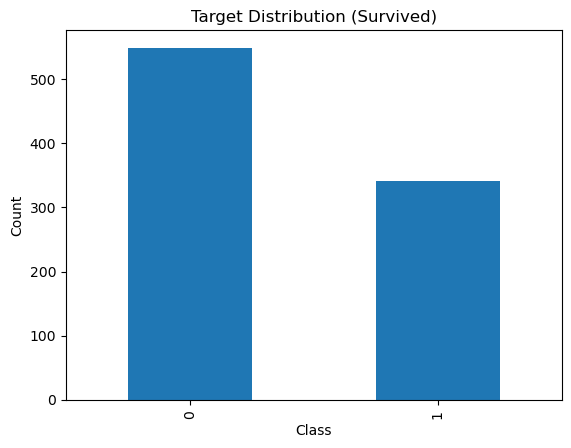

In [6]:
plt.figure()
df[target].value_counts().plot(kind="bar")
plt.title("Target Distribution (Survived)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

<Figure size 640x480 with 0 Axes>

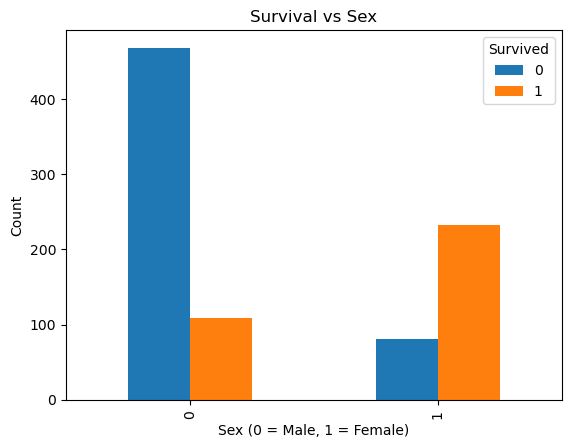

In [7]:
plt.figure()
pd.crosstab(df["Sex"], df[target]).plot(kind="bar")
plt.title("Survival vs Sex")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Count")
plt.show()

In [8]:
def entropy(y):
    total = len(y)
    ent = 0
    for cls in y.unique():
        p = sum(y == cls) / total
        ent -= p * np.log2(p)
    return ent

def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    weighted_entropy = 0

    for value in data[feature].unique():
        subset = data[data[feature] == value]
        weight = len(subset) / len(data)
        weighted_entropy += weight * entropy(subset[target])

    return total_entropy - weighted_entropy

In [9]:
ig_sex = information_gain(df, "Sex", target)
ig_pclass = information_gain(df, "Pclass", target)

print("\nManual Information Gain")
print("IG(Sex):", ig_sex)
print("IG(Pclass):", ig_pclass)


Manual Information Gain
IG(Sex): 0.2176601066606142
IG(Pclass): 0.0838310452960116


In [10]:
X = df[features]
y = df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=1, random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print("\nValidation Accuracy:", accuracy)


Validation Accuracy: 0.7821229050279329


In [12]:
root_index = dt.tree_.feature[0]
print("sklearn chosen root feature:", features[root_index])

sklearn chosen root feature: Sex


In [13]:
print("\nComparison Result")
print("Feature with highest manual IG:",
      "Sex" if ig_sex > ig_pclass else "Pclass")
print("sklearn root feature:", features[root_index])


Comparison Result
Feature with highest manual IG: Sex
sklearn root feature: Sex
